# 🚗 Análisis Exploratorio de Datos - Dataset Uber

## 📋 Objetivo del Proyecto
Analizar el dataset de reservas de Uber para **predecir el porcentaje de cancelación** de viajes basado en diferentes parámetros.

### 🎯 Objetivos Específicos:
1. Explorar la estructura y calidad de los datos
2. Identificar patrones en las cancelaciones de viajes
3. Analizar correlaciones entre variables
4. Preparar los datos para modelado predictivo

### 📊 Dataset:
- **Archivo**: `ncr_ride_bookings.csv`
- **Registros**: 150,000 reservas
- **Variables**: 21 columnas con información temporal, geográfica, operacional y de calidad

---

## 1. 📦 Setup e Importación de Librerías

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas exitosamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Librerías importadas exitosamente
Pandas version: 2.3.2
NumPy version: 2.3.2


## 2. 📂 Carga y Exploración Básica de Datos

In [18]:
# Cargar el dataset
df = pd.read_csv('ncr_ride_bookings.csv')

print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("="*50)
print(f"Tamaño del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"\nColumnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

📊 INFORMACIÓN BÁSICA DEL DATASET
Tamaño del dataset: 150,000 filas x 21 columnas

Columnas disponibles:
 1. Date
 2. Time
 3. Booking ID
 4. Booking Status
 5. Customer ID
 6. Vehicle Type
 7. Pickup Location
 8. Drop Location
 9. Avg VTAT
10. Avg CTAT
11. Cancelled Rides by Customer
12. Reason for cancelling by Customer
13. Cancelled Rides by Driver
14. Driver Cancellation Reason
15. Incomplete Rides
16. Incomplete Rides Reason
17. Booking Value
18. Ride Distance
19. Driver Ratings
20. Customer Rating
21. Payment Method


In [19]:
# Primeras filas
print("📋 PRIMERAS 5 FILAS:")
display(df.head())

print("\n🔍 INFORMACIÓN GENERAL:")
df.info()

📋 PRIMERAS 5 FILAS:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI



🔍 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for canc

In [20]:
# Estadísticas descriptivas
print("📈 ESTADÍSTICAS DESCRIPTIVAS:")
display(df.describe())

📈 ESTADÍSTICAS DESCRIPTIVAS:


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


❌ ANÁLISIS DE DATOS FALTANTES:


,Valores_Nulos,Porcentaje
Incomplete Rides Reason,141000,94.0
Incomplete Rides,141000,94.0
Reason for cancelling by Customer,139500,93.0
Cancelled Rides by Customer,139500,93.0
Cancelled Rides by Driver,123000,82.0
Driver Cancellation Reason,123000,82.0
Driver Ratings,57000,38.0
Customer Rating,57000,38.0
Avg CTAT,48000,32.0
Ride Distance,48000,32.0


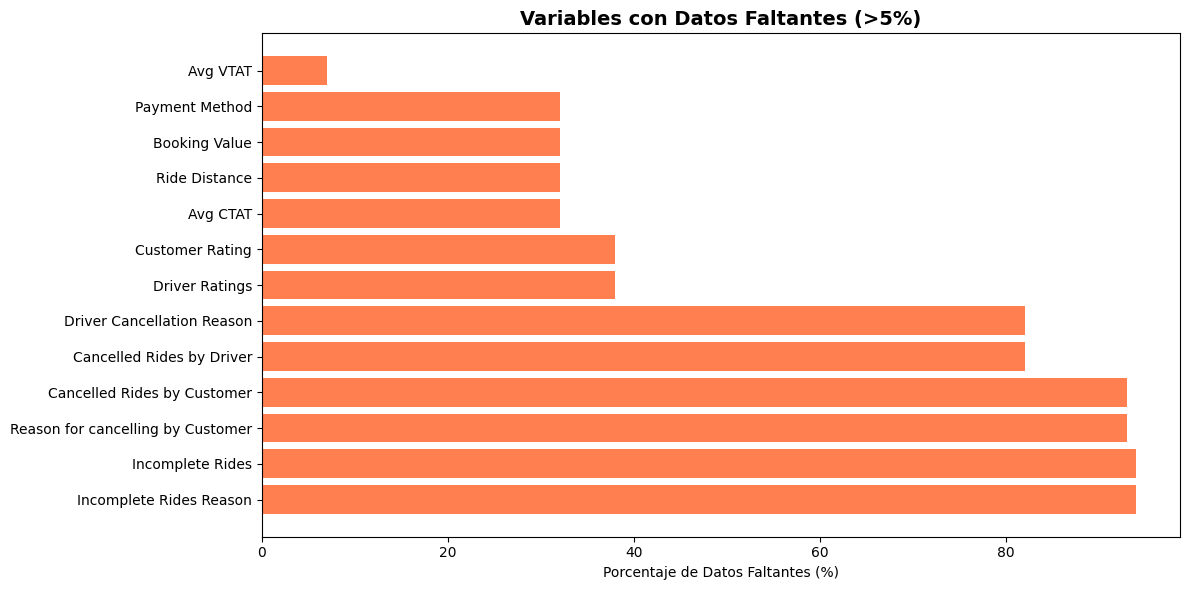

In [21]:
# Análisis de datos faltantes
print("❌ ANÁLISIS DE DATOS FALTANTES:")
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_info = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Porcentaje': null_percentages
}).sort_values('Porcentaje', ascending=False)

missing_data = null_info[null_info['Valores_Nulos'] > 0]
display(missing_data)

# Visualización de datos faltantes
plt.figure(figsize=(12, 6))
missing_data_plot = missing_data[missing_data['Porcentaje'] > 5]  # Solo variables con >5% faltantes
plt.barh(missing_data_plot.index, missing_data_plot['Porcentaje'], color='coral')
plt.xlabel('Porcentaje de Datos Faltantes (%)')
plt.title('Variables con Datos Faltantes (>5%)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

## 3. 🧹 Limpieza y Preparación de Datos

In [22]:
# Conversión de tipos de datos
print("🔄 CONVERSIÓN DE TIPOS DE DATOS:")

# Convertir Date y Time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

print("✅ Fechas y horas convertidas")

# Extraer componentes temporales
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

print("✅ Características temporales extraídas")
print(f"Rango de fechas: {df['Date'].min()} a {df['Date'].max()}")

🔄 CONVERSIÓN DE TIPOS DE DATOS:
✅ Fechas y horas convertidas
✅ Características temporales extraídas
Rango de fechas: 2024-01-01 00:00:00 a 2024-12-30 00:00:00


In [23]:
# Crear variable objetivo
print("🎯 CREACIÓN DE VARIABLE OBJETIVO:")

# Definir qué consideramos como "cancelado"
cancellation_statuses = ['Cancelled by Customer', 'Cancelled by Driver', 'No Driver Found', 'Incomplete']
df['Is_Cancelled'] = df['Booking Status'].apply(lambda x: 1 if x in cancellation_statuses else 0)

# Estadísticas de la variable objetivo
total_bookings = len(df)
cancelled_bookings = df['Is_Cancelled'].sum()
completed_bookings = total_bookings - cancelled_bookings
cancellation_rate = (cancelled_bookings / total_bookings) * 100

print(f"Total de reservas: {total_bookings:,}")
print(f"Reservas completadas: {completed_bookings:,} ({100-cancellation_rate:.1f}%)")
print(f"Reservas canceladas: {cancelled_bookings:,} ({cancellation_rate:.1f}%)")
print(f"\n📊 Tasa de cancelación general: {cancellation_rate:.1f}%")

🎯 CREACIÓN DE VARIABLE OBJETIVO:
Total de reservas: 150,000
Reservas completadas: 93,000 (62.0%)
Reservas canceladas: 57,000 (38.0%)

📊 Tasa de cancelación general: 38.0%


🚗 DISTRIBUCIÓN DETALLADA DE ESTADOS:


,Count,Percentage
Booking Status,,
Completed,93000,62.0
Cancelled by Driver,27000,18.0
No Driver Found,10500,7.0
Cancelled by Customer,10500,7.0
Incomplete,9000,6.0


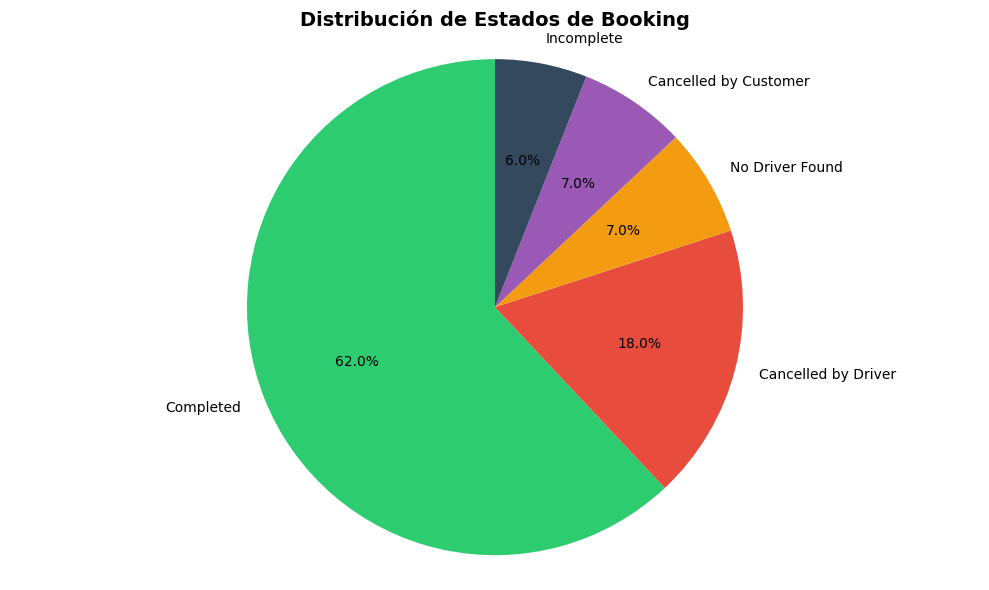

In [24]:
# Distribución detallada de estados de booking
print("🚗 DISTRIBUCIÓN DETALLADA DE ESTADOS:")
status_counts = df['Booking Status'].value_counts()
status_percentages = (status_counts / len(df)) * 100

status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentages
})

display(status_summary)

# Gráfico de distribución
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#34495e']
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Estados de Booking', fontweight='bold', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 4. 📊 Análisis Exploratorio Visual

⏰ ANÁLISIS TEMPORAL - CANCELACIONES POR HORA:


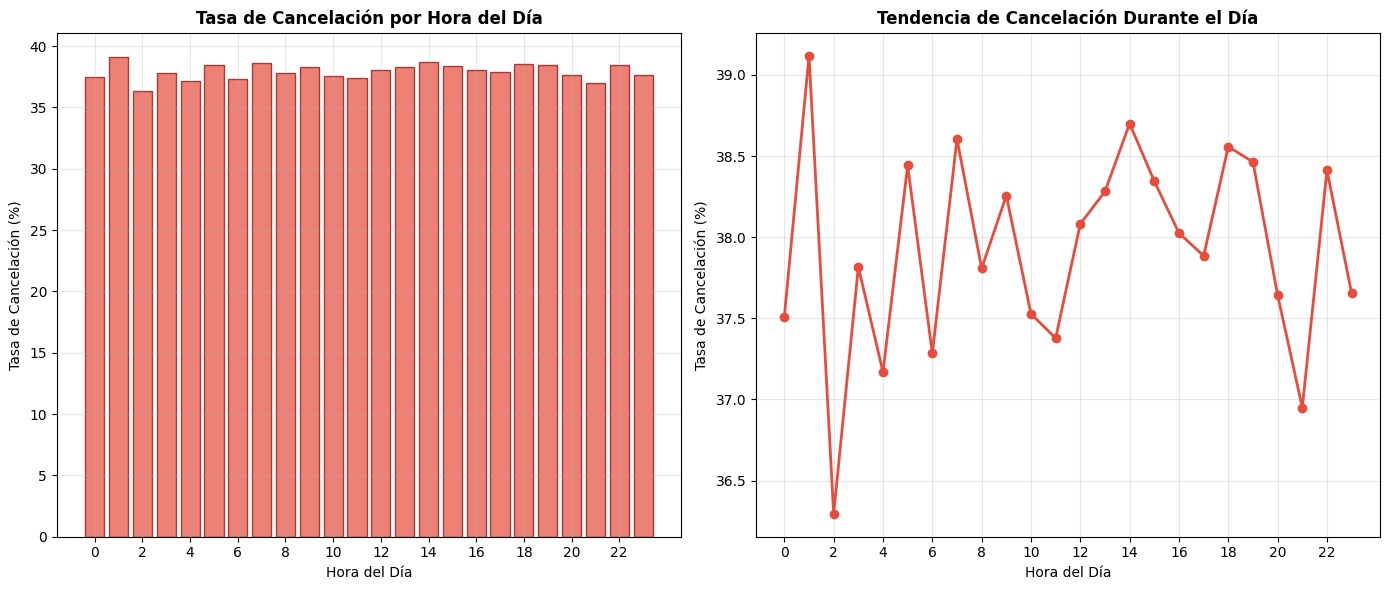

Hora con mayor cancelación: 1:00 (39.1%)
Hora con menor cancelación: 2:00 (36.3%)
Diferencia pico-valle: 2.8 puntos porcentuales


In [25]:
# Análisis temporal - Cancelaciones por hora
print("⏰ ANÁLISIS TEMPORAL - CANCELACIONES POR HORA:")

hourly_analysis = df.groupby('Hour')['Is_Cancelled'].agg(['count', 'sum', 'mean'])
hourly_analysis['cancellation_rate'] = (hourly_analysis['sum'] / hourly_analysis['count']) * 100

plt.figure(figsize=(14, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
plt.bar(hourly_analysis.index, hourly_analysis['cancellation_rate'], 
        color='#e74c3c', alpha=0.7, edgecolor='darkred')
plt.xlabel('Hora del Día')
plt.ylabel('Tasa de Cancelación (%)')
plt.title('Tasa de Cancelación por Hora del Día', fontweight='bold')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

# Gráfico de línea
plt.subplot(1, 2, 2)
plt.plot(hourly_analysis.index, hourly_analysis['cancellation_rate'], 
         marker='o', linewidth=2, color='#e74c3c')
plt.xlabel('Hora del Día')
plt.ylabel('Tasa de Cancelación (%)')
plt.title('Tendencia de Cancelación Durante el Día', fontweight='bold')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas temporales
peak_hour = hourly_analysis['cancellation_rate'].idxmax()
peak_rate = hourly_analysis['cancellation_rate'].max()
low_hour = hourly_analysis['cancellation_rate'].idxmin()
low_rate = hourly_analysis['cancellation_rate'].min()

print(f"Hora con mayor cancelación: {peak_hour}:00 ({peak_rate:.1f}%)")
print(f"Hora con menor cancelación: {low_hour}:00 ({low_rate:.1f}%)")
print(f"Diferencia pico-valle: {peak_rate - low_rate:.1f} puntos porcentuales")

🚙 ANÁLISIS POR TIPO DE VEHÍCULO:


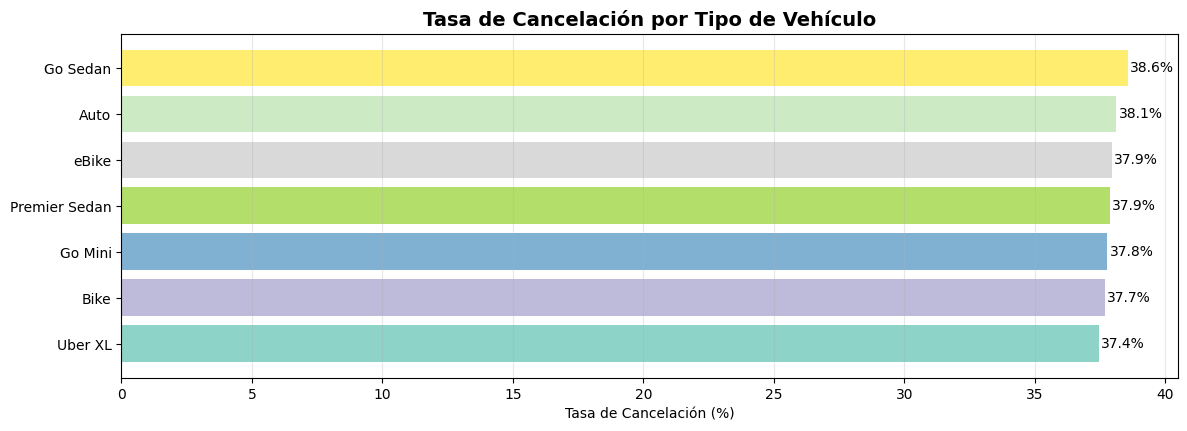


Top 3 vehículos con mayor cancelación:
  Go Sedan: 38.6% (10,465/27,141)
  Auto: 38.1% (14,264/37,419)
  eBike: 37.9% (4,006/10,557)


In [26]:
# Análisis por tipo de vehículo
print("🚙 ANÁLISIS POR TIPO DE VEHÍCULO:")

vehicle_analysis = df.groupby('Vehicle Type')['Is_Cancelled'].agg(['count', 'sum', 'mean'])
vehicle_analysis['cancellation_rate'] = (vehicle_analysis['sum'] / vehicle_analysis['count']) * 100
vehicle_analysis = vehicle_analysis.sort_values('cancellation_rate', ascending=True)

plt.figure(figsize=(12, 8))

# Gráfico horizontal
plt.subplot(2, 1, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(vehicle_analysis)))
bars = plt.barh(vehicle_analysis.index, vehicle_analysis['cancellation_rate'], color=colors)
plt.xlabel('Tasa de Cancelación (%)')
plt.title('Tasa de Cancelación por Tipo de Vehículo', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar, rate in zip(bars, vehicle_analysis['cancellation_rate']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{rate:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

print("\nTop 3 vehículos con mayor cancelación:")
for vehicle, data in vehicle_analysis.sort_values('cancellation_rate', ascending=False).head(3).iterrows():
    print(f"  {vehicle}: {data['cancellation_rate']:.1f}% ({data['sum']:,.0f}/{data['count']:,.0f})")

💳 ANÁLISIS DE MÉTODOS DE PAGO:


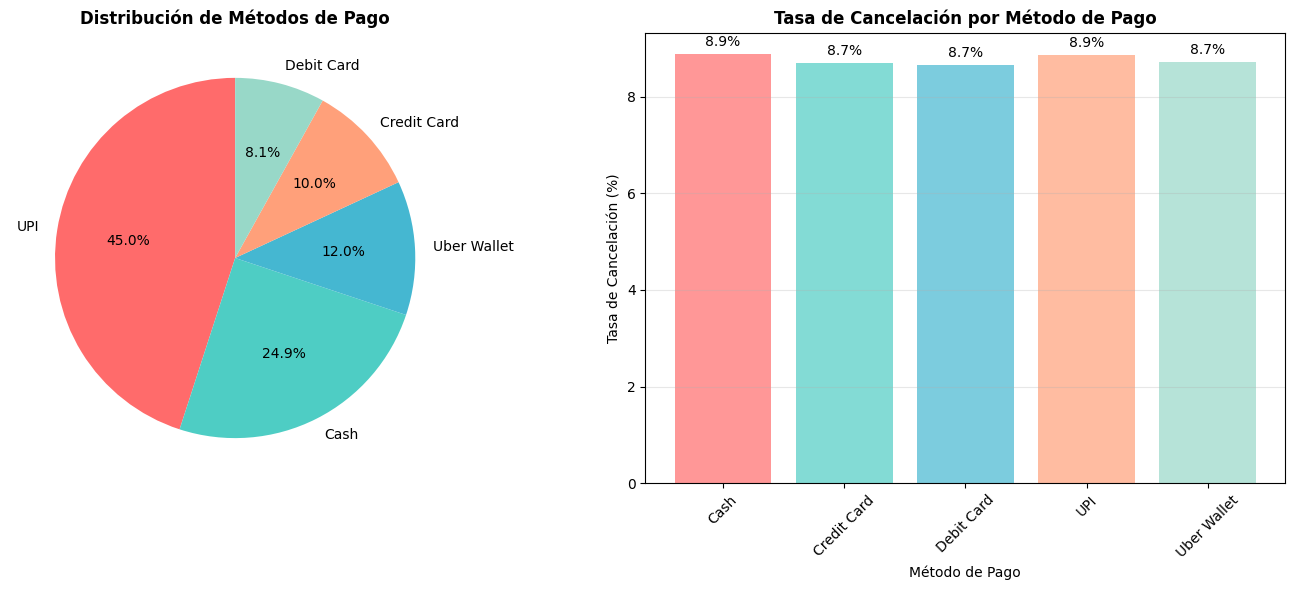


Estadísticas por método de pago:
  Cash: 8.9% (2,253/25,367)
  Credit Card: 8.7% (889/10,209)
  Debit Card: 8.7% (713/8,239)
  UPI: 8.9% (4,075/45,909)
  Uber Wallet: 8.7% (1,070/12,276)


In [27]:
# Análisis de métodos de pago
print("💳 ANÁLISIS DE MÉTODOS DE PAGO:")

# Filtrar solo datos con método de pago válido
payment_data = df.dropna(subset=['Payment Method'])
payment_analysis = payment_data.groupby('Payment Method')['Is_Cancelled'].agg(['count', 'sum', 'mean'])
payment_analysis['cancellation_rate'] = (payment_analysis['sum'] / payment_analysis['count']) * 100

plt.figure(figsize=(14, 6))

# Distribución de métodos de pago
plt.subplot(1, 2, 1)
payment_counts = payment_data['Payment Method'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Métodos de Pago', fontweight='bold')

# Tasa de cancelación por método de pago
plt.subplot(1, 2, 2)
bars = plt.bar(payment_analysis.index, payment_analysis['cancellation_rate'], 
               color=colors, alpha=0.7)
plt.xlabel('Método de Pago')
plt.ylabel('Tasa de Cancelación (%)')
plt.title('Tasa de Cancelación por Método de Pago', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, rate in zip(bars, payment_analysis['cancellation_rate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nEstadísticas por método de pago:")
for payment, data in payment_analysis.iterrows():
    if data['count'] > 1000:  # Solo métodos con suficientes datos
        print(f"  {payment}: {data['cancellation_rate']:.1f}% ({data['sum']:,.0f}/{data['count']:,.0f})")

## 5. 🔗 Análisis de Correlaciones

🔗 ANÁLISIS DE CORRELACIONES:


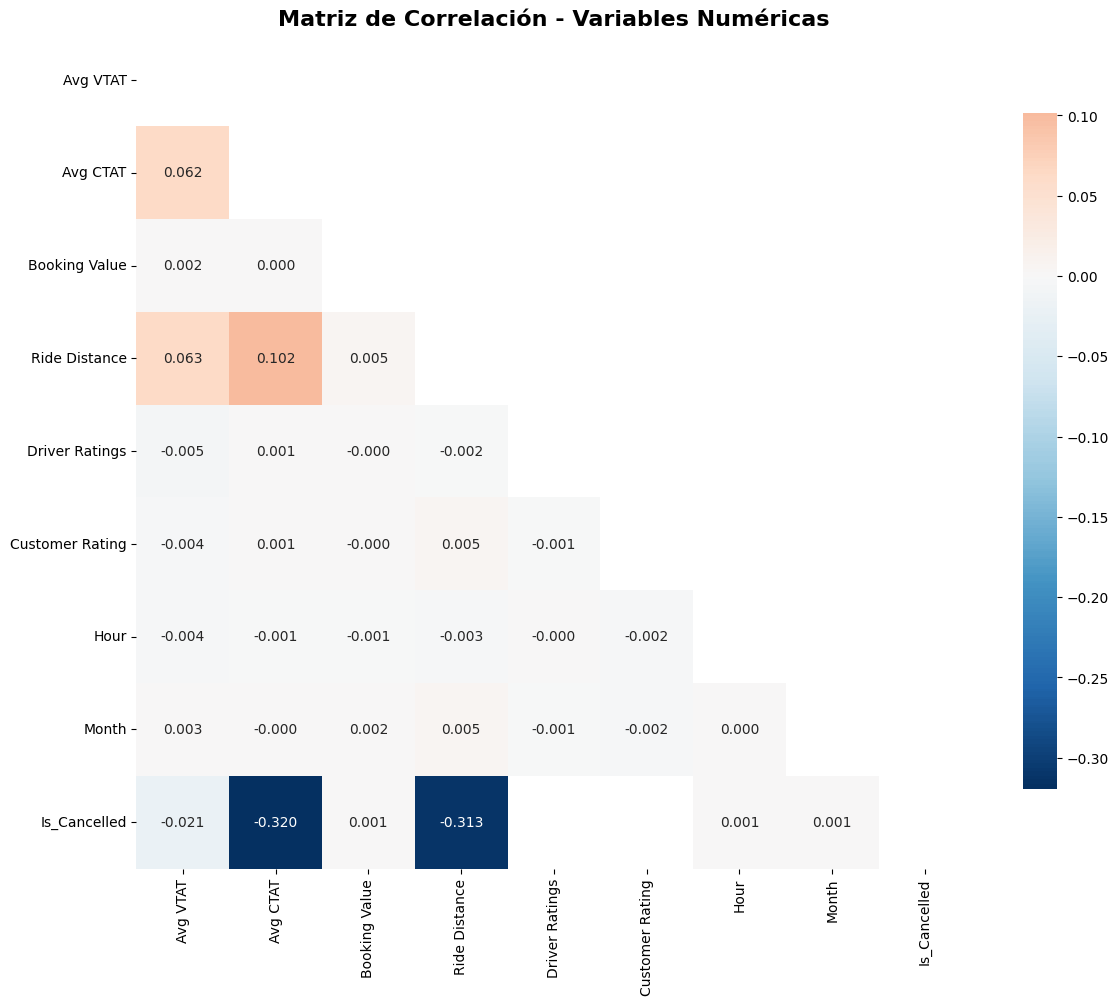


📊 CORRELACIONES CON LA CANCELACIÓN (ordenadas por magnitud):
  📉 Avg CTAT: -0.320 (fuerte)
  📉 Ride Distance: -0.313 (fuerte)
  📉 Avg VTAT: -0.021 (débil)
  📈 Booking Value: 0.001 (débil)
  📈 Hour: 0.001 (débil)
  📈 Month: 0.001 (débil)


In [28]:
# Análisis de correlaciones
print("🔗 ANÁLISIS DE CORRELACIONES:")

# Seleccionar variables numéricas relevantes
numeric_vars = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 
                'Driver Ratings', 'Customer Rating', 'Hour', 'Month', 'Is_Cancelled']

correlation_data = df[numeric_vars].corr()

# Matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, annot=True, cmap='RdBu_r', center=0, 
            square=True, mask=mask, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Matriz de Correlación - Variables Numéricas', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
target_correlations = correlation_data['Is_Cancelled'].drop('Is_Cancelled').sort_values(key=abs, ascending=False)
print("\n📊 CORRELACIONES CON LA CANCELACIÓN (ordenadas por magnitud):")
for var, corr in target_correlations.items():
    if not pd.isna(corr):
        direction = "📈" if corr > 0 else "📉"
        strength = "fuerte" if abs(corr) > 0.3 else "moderada" if abs(corr) > 0.1 else "débil"
        print(f"  {direction} {var}: {corr:.3f} ({strength})")

📈 GRÁFICOS DE DISPERSIÓN - CORRELACIONES MÁS RELEVANTES:


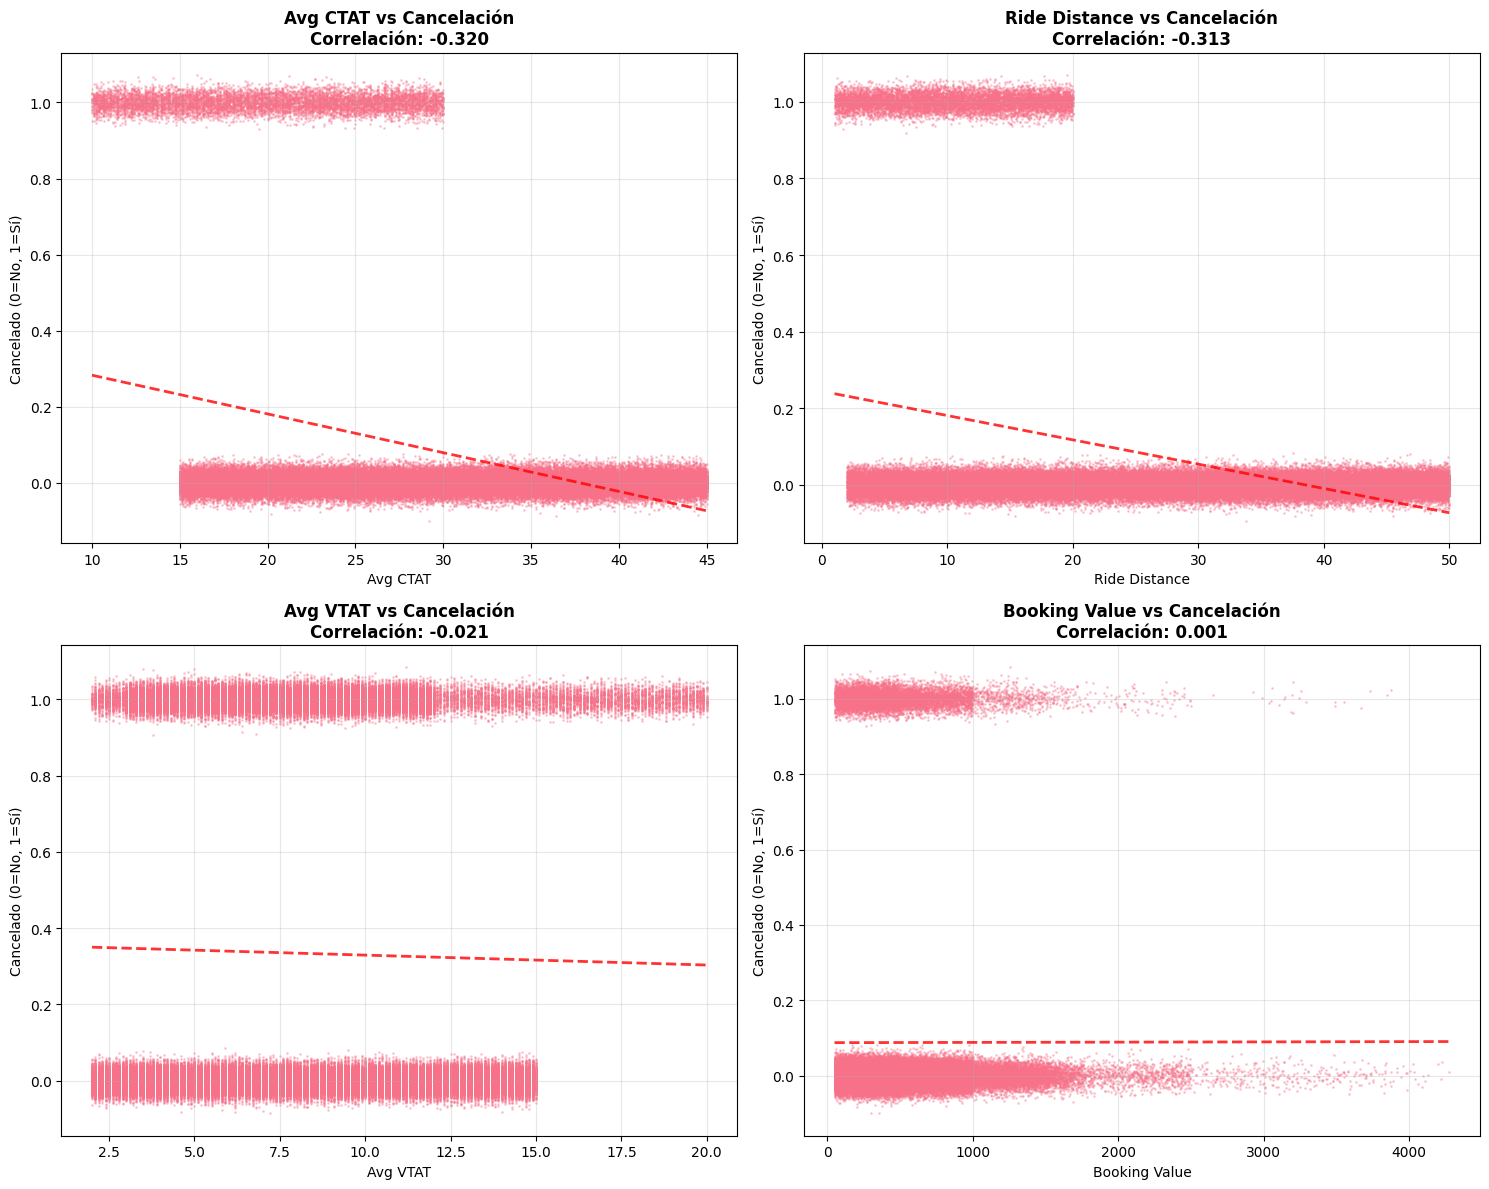

In [29]:
# Gráficos de dispersión para las correlaciones más fuertes
print("📈 GRÁFICOS DE DISPERSIÓN - CORRELACIONES MÁS RELEVANTES:")

# Identificar las 4 correlaciones más fuertes (excluyendo NaN)
valid_correlations = target_correlations.dropna()
top_correlations = valid_correlations.head(4)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (var, corr) in enumerate(top_correlations.items()):
    if i < 4:
        # Filtrar datos válidos para la visualización
        valid_data = df[[var, 'Is_Cancelled']].dropna()
        
        # Gráfico de dispersión con jitter para variable binaria
        x = valid_data[var]
        y = valid_data['Is_Cancelled'] + np.random.normal(0, 0.02, len(valid_data))
        
        axes[i].scatter(x, y, alpha=0.3, s=1)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Cancelado (0=No, 1=Sí)')
        axes[i].set_title(f'{var} vs Cancelación\nCorrelación: {corr:.3f}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # Línea de tendencia
        z = np.polyfit(x, valid_data['Is_Cancelled'], 1)
        p = np.poly1d(z)
        axes[i].plot(x.sort_values(), p(x.sort_values()), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

## 6. 💡 Insights y Conclusiones Clave

In [30]:
print("🎯 RESUMEN EJECUTIVO - INSIGHTS CLAVE")
print("="*60)

# 1. Tasa general de cancelación
print(f"\n1. 📊 TASA GENERAL DE CANCELACIÓN: {cancellation_rate:.1f}%")
print(f"   • {cancelled_bookings:,} de {total_bookings:,} reservas fueron canceladas")
print(f"   • Esto representa una tasa alta comparada con estándares de la industria")

# 2. Distribución por causa
print(f"\n2. 🔍 PRINCIPALES CAUSAS DE CANCELACIÓN:")
cancellation_breakdown = df[df['Is_Cancelled'] == 1]['Booking Status'].value_counts()
for cause, count in cancellation_breakdown.items():
    pct = (count / cancelled_bookings) * 100
    print(f"   • {cause}: {count:,} ({pct:.1f}% de cancelaciones)")

# 3. Patrones temporales
print(f"\n3. ⏰ PATRONES TEMPORALES:")
print(f"   • Variación horaria mínima: {peak_rate - low_rate:.1f} puntos porcentuales")
print(f"   • Hora pico de cancelación: {peak_hour}:00 ({peak_rate:.1f}%)")
print(f"   • La consistencia temporal sugiere factores estructurales")

# 4. Vehículos más problemáticos
print(f"\n4. 🚗 ANÁLISIS POR VEHÍCULO:")
worst_vehicle = vehicle_analysis.sort_values('cancellation_rate', ascending=False).iloc[0]
best_vehicle = vehicle_analysis.sort_values('cancellation_rate', ascending=True).iloc[0]
print(f"   • Mayor cancelación: {worst_vehicle.name} ({worst_vehicle['cancellation_rate']:.1f}%)")
print(f"   • Menor cancelación: {best_vehicle.name} ({best_vehicle['cancellation_rate']:.1f}%)")
print(f"   • Diferencia: {worst_vehicle['cancellation_rate'] - best_vehicle['cancellation_rate']:.1f} puntos porcentuales")

# 5. Correlaciones más importantes
print(f"\n5. 🔗 VARIABLES MÁS PREDICTIVAS:")
for var, corr in valid_correlations.head(3).items():
    direction = "positiva" if corr > 0 else "negativa"
    print(f"   • {var}: correlación {direction} de {corr:.3f}")

print(f"\n" + "="*60)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")

🎯 RESUMEN EJECUTIVO - INSIGHTS CLAVE

1. 📊 TASA GENERAL DE CANCELACIÓN: 38.0%
   • 57,000 de 150,000 reservas fueron canceladas
   • Esto representa una tasa alta comparada con estándares de la industria

2. 🔍 PRINCIPALES CAUSAS DE CANCELACIÓN:
   • Cancelled by Driver: 27,000 (47.4% de cancelaciones)
   • No Driver Found: 10,500 (18.4% de cancelaciones)
   • Cancelled by Customer: 10,500 (18.4% de cancelaciones)
   • Incomplete: 9,000 (15.8% de cancelaciones)

3. ⏰ PATRONES TEMPORALES:
   • Variación horaria mínima: 2.8 puntos porcentuales
   • Hora pico de cancelación: 1:00 (39.1%)
   • La consistencia temporal sugiere factores estructurales

4. 🚗 ANÁLISIS POR VEHÍCULO:
   • Mayor cancelación: Go Sedan (38.6%)
   • Menor cancelación: Uber XL (37.4%)
   • Diferencia: 1.1 puntos porcentuales

5. 🔗 VARIABLES MÁS PREDICTIVAS:
   • Avg CTAT: correlación negativa de -0.320
   • Ride Distance: correlación negativa de -0.313
   • Avg VTAT: correlación negativa de -0.021

✅ ANÁLISIS EXPLORATO

## 7. 🚀 Preparación para Modelado Predictivo

In [31]:
print("🚀 PREPARACIÓN PARA MODELADO PREDICTIVO")
print("="*50)

# Variables candidatas para el modelo
print("\n📋 VARIABLES CANDIDATAS PARA EL MODELO:")

# 1. Variables temporales
temporal_vars = ['Hour', 'DayOfWeek', 'Month', 'DayOfMonth']
print(f"\n  🕐 Temporales: {temporal_vars}")

# 2. Variables categóricas
categorical_vars = ['Vehicle Type', 'Payment Method', 'Pickup Location', 'Drop Location']
print(f"  🏷️  Categóricas: {categorical_vars}")

# 3. Variables numéricas con correlación relevante
relevant_numeric = [var for var, corr in valid_correlations.items() if abs(corr) > 0.05]
print(f"  📊 Numéricas relevantes: {relevant_numeric}")

# 4. Variables derivadas sugeridas
derived_vars = ['Is_Weekend', 'Is_Peak_Hour', 'Distance_Category', 'Price_Per_KM']
print(f"  ⚙️  Derivadas sugeridas: {derived_vars}")

# Crear algunas variables derivadas como ejemplo
df['Is_Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
df['Is_Peak_Hour'] = df['Hour'].isin([7, 8, 9, 17, 18, 19, 20]).astype(int)

print(f"\n✅ Variables derivadas creadas como ejemplo")

# Estadísticas de variables derivadas
weekend_cancellation = df.groupby('Is_Weekend')['Is_Cancelled'].mean() * 100
peak_cancellation = df.groupby('Is_Peak_Hour')['Is_Cancelled'].mean() * 100

print(f"\n📈 ESTADÍSTICAS DE VARIABLES DERIVADAS:")
print(f"  • Cancelación en fin de semana: {weekend_cancellation[1]:.1f}% vs días laborales: {weekend_cancellation[0]:.1f}%")
print(f"  • Cancelación en horas pico: {peak_cancellation[1]:.1f}% vs horas normales: {peak_cancellation[0]:.1f}%")

🚀 PREPARACIÓN PARA MODELADO PREDICTIVO

📋 VARIABLES CANDIDATAS PARA EL MODELO:

  🕐 Temporales: ['Hour', 'DayOfWeek', 'Month', 'DayOfMonth']
  🏷️  Categóricas: ['Vehicle Type', 'Payment Method', 'Pickup Location', 'Drop Location']
  📊 Numéricas relevantes: ['Avg CTAT', 'Ride Distance']
  ⚙️  Derivadas sugeridas: ['Is_Weekend', 'Is_Peak_Hour', 'Distance_Category', 'Price_Per_KM']

✅ Variables derivadas creadas como ejemplo

📈 ESTADÍSTICAS DE VARIABLES DERIVADAS:
  • Cancelación en fin de semana: 37.7% vs días laborales: 38.1%
  • Cancelación en horas pico: 38.2% vs horas normales: 37.9%


In [32]:
# Recomendaciones para próximos pasos
print("\n🎯 RECOMENDACIONES PARA PRÓXIMOS PASOS:")
print("="*50)

recommendations = [
    "1. 🧹 PREPROCESAMIENTO:",
    "   • Imputar valores faltantes en variables numéricas (media/mediana)",
    "   • Codificar variables categóricas (One-Hot o Label Encoding)",
    "   • Normalizar/estandarizar variables numéricas",
    "   • Manejar alta cardinalidad en ubicaciones (agrupación geográfica)",
    "",
    "2. 🎨 INGENIERÍA DE CARACTERÍSTICAS:",
    "   • Crear más variables temporales (estación, festividades)",
    "   • Agrupar ubicaciones por zonas/distritos",
    "   • Calcular distancia euclidiana entre pickup/drop",
    "   • Crear ratios (precio por km, tiempo de espera relativo)",
    "",
    "3. 🤖 MODELADO:",
    "   • Probar múltiples algoritmos: Random Forest, XGBoost, Logistic Regression",
    "   • Validación cruzada estratificada",
    "   • Optimización de hiperparámetros",
    "   • Análisis de importancia de características",
    "",
    "4. 📊 EVALUACIÓN:",
    "   • Métricas: Precision, Recall, F1-Score, AUC-ROC",
    "   • Matriz de confusión",
    "   • Curvas de aprendizaje",
    "   • Análisis de casos límite"
]

for rec in recommendations:
    print(rec)

modeling_vars = temporal_vars + categorical_vars + relevant_numeric + ['Is_Weekend', 'Is_Peak_Hour']
print(f"\n💾 DATOS PREPARADOS PARA MODELADO:")
print(f"   • Dataset limpio con {len(df):,} registros")
print(f"   • Variable objetivo balanceada: {cancellation_rate:.1f}% cancelaciones")
print(f"   • {len([v for v in modeling_vars if v in df.columns])} variables candidatas identificadas")
print(f"   • Análisis exploratorio completado exitosamente")

print(f"\n🎉 ¡LISTO PARA COMENZAR EL MODELADO PREDICTIVO!")


🎯 RECOMENDACIONES PARA PRÓXIMOS PASOS:
1. 🧹 PREPROCESAMIENTO:
   • Imputar valores faltantes en variables numéricas (media/mediana)
   • Codificar variables categóricas (One-Hot o Label Encoding)
   • Normalizar/estandarizar variables numéricas
   • Manejar alta cardinalidad en ubicaciones (agrupación geográfica)

2. 🎨 INGENIERÍA DE CARACTERÍSTICAS:
   • Crear más variables temporales (estación, festividades)
   • Agrupar ubicaciones por zonas/distritos
   • Calcular distancia euclidiana entre pickup/drop
   • Crear ratios (precio por km, tiempo de espera relativo)

3. 🤖 MODELADO:
   • Probar múltiples algoritmos: Random Forest, XGBoost, Logistic Regression
   • Validación cruzada estratificada
   • Optimización de hiperparámetros
   • Análisis de importancia de características

4. 📊 EVALUACIÓN:
   • Métricas: Precision, Recall, F1-Score, AUC-ROC
   • Matriz de confusión
   • Curvas de aprendizaje
   • Análisis de casos límite

💾 DATOS PREPARADOS PARA MODELADO:
   • Dataset limpio con